# Objective- Here in this case the target variable is price, the Indian company is doing the analysis to launch the their car in US market. so what are the variables which affect the car price in US market. let analysis the car market.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_excel(r'C:\Users\Asus\IMS_pro_school\kuiper.xlsx')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null int64
Make        804 non-null object
Model       804 non-null object
Trim        804 non-null object
Type        804 non-null object
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
#check for nulls
df.isnull().sum(axis = 0)

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
# Removing Outlier and standard normal distribution method or imperical rule

In [8]:
desc_df = df.describe()
# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
# display it
desc_df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000
+3_std,50997.702170,44420.893200,9.431251,6.353999,6.077870,2.047994,2.080438,2.065945
-3_std,-8311.414635,-4757.025041,1.106063,-0.279372,0.976857,-0.543019,-0.722229,-0.618184


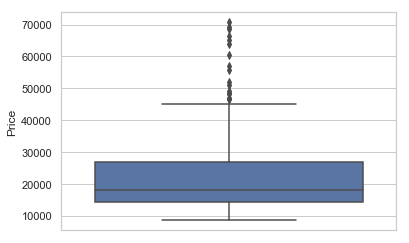

In [9]:
sns.boxplot(y='Price',data=df)

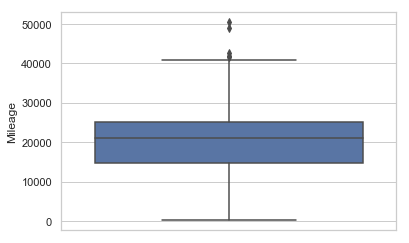

In [10]:
sns.boxplot(y='Mileage',data=df)

-4393.290277667051 45383.68078365929


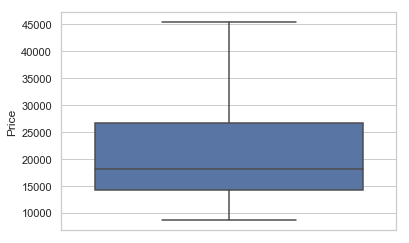

In [11]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
print(low,high)

# np.where statement is used instead of "if-else"
df['Price']=np.where(df['Price'] > high,high,df['Price']) #upper limit

df['Price']=np.where(df['Price'] < low,low,df['Price']) #lower limit

sns.boxplot(y=df["Price"])

-1260.75 41097.25


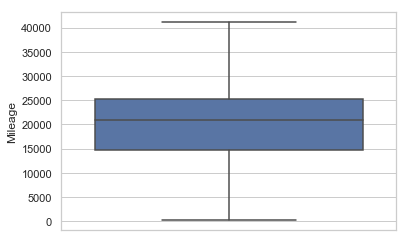

In [12]:
q1=df['Mileage'].quantile(0.25)
q3=df['Mileage'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
print(low,high)

# np.where statement is used instead of "if-else"
df['Mileage']=np.where(df['Mileage'] > high,high,df['Mileage']) #upper limit

df['Mileage']=np.where(df['Mileage'] < low,low,df['Mileage']) #lower limit

sns.boxplot(y=df["Mileage"])

In [13]:
# there is no need to check outlier of categorical data and even for cylinder, doors, liters, cruise, sound, leather as per the car features.

In [14]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21099.998496,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9031.505318,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,45383.680784,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


###  As we can see convertible as a highest price margin, but sedan and coupe are the best seller in the US market because it as the hghest number of model Type of car.

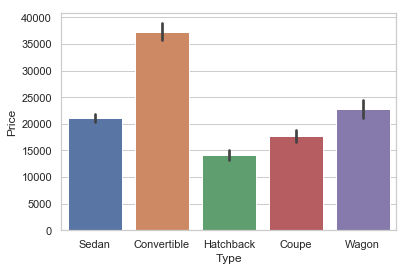

In [15]:
sns.barplot(x='Type', y='Price', data=df)

### As per the price 8 cylinder is costly, but 4 and 6 cylinder are mostly prefered by customer because there are very few models are made with 8 cylinder

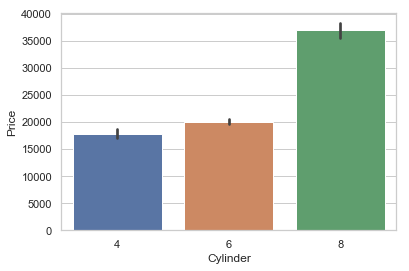

In [16]:
sns.barplot(x='Cylinder', y='Price', data=df)

### As per the us market 2 doors car are costly as they design for high performance, good looks,specially to drive for high value customer.

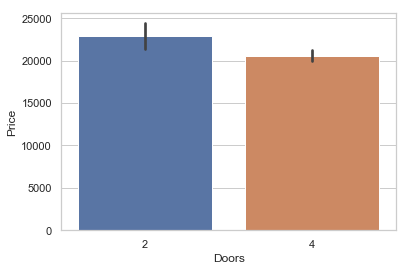

In [17]:
sns.barplot(x='Doors', y='Price', data=df)

In [18]:
df.Liter.value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
2.8     10
3.1     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

### As per the price 6 liter engine are costly, but most prefered model is with 2.2 liter and 3.8 liter engine.

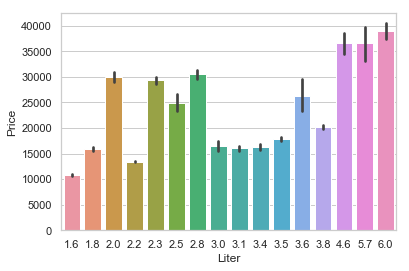

In [19]:
sns.barplot(x='Liter', y='Price', data=df)

In [20]:
df.Make.value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Cadillac      80
Buick         80
Saturn        60
Name: Make, dtype: int64

### As per the price Cadillac is the most costly selling cars in US and Chevrolet as the highest number of model, so the most prefered brand in US is Chevrolet, if price is the issue. so we study chevrolet for budget cars model and Cadillac for High budget model.

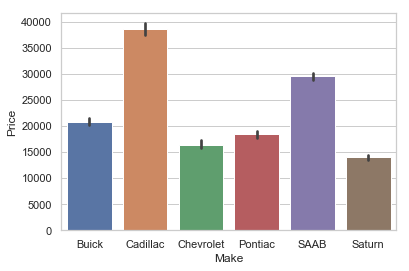

In [21]:
sns.barplot(x='Make', y='Price', data=df)

# Data Preprocessing
* Assign Lables to categorical data

In [22]:
df.Make=(LabelEncoder().fit_transform(df.Make))
df.Model=(LabelEncoder().fit_transform(df.Model))
df.Trim=(LabelEncoder().fit_transform(df.Trim))
df.Type=(LabelEncoder().fit_transform(df.Type))

In [23]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342.0,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832.0,0,10,44,3,6,3.1,4,1,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null float64
Make        804 non-null int32
Model       804 non-null int32
Trim        804 non-null int32
Type        804 non-null int32
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(3), int32(4), int64(5)
memory usage: 62.9 KB


* There is no missing values in dataset. All the variables are in numeric

## Here in this case the target variable is price, the Indian company is doing the analysis to launch the their car in US market. so what are the variables which affect the car price in US market. let analysis the car market.

# Rescaling the features
* It is extremely important to rescaing the variables so that they a comparable scale.

In [25]:
#defining a normalisation function
def normalize (x):
    return ((x-np.min(x)) / (max(x)-min(x)))

#applying normalize ()  to all columns
df1 = df.apply(normalize)

def denormalize (x):
    return (x*(max(x)-min(x))+np.min(x))

#applying denormalize () to all columns
#df1 = df.apply(denormalize)

#applying denormalize () to all columns
df1 = df2.apply(denormalize)

In [26]:
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0.236093,0.194826,0.0,0.322581,0.956522,0.75,0.5,0.340909,1.0,1.0,1.0,1.0
1,0.242296,0.217211,0.0,0.322581,0.956522,0.75,0.5,0.340909,1.0,1.0,1.0,0.0
2,0.206286,0.316669,0.0,0.322581,0.956522,0.75,0.5,0.340909,1.0,1.0,1.0,0.0
3,0.209499,0.393718,0.0,0.322581,0.956522,0.75,0.5,0.340909,1.0,1.0,0.0,0.0
4,0.209560,0.479192,0.0,0.322581,0.956522,0.75,0.5,0.340909,1.0,1.0,0.0,1.0


# Data Partition

In [27]:
data=df1

In [28]:
# define our input variable (x) & output variable
x = data.drop("Price", axis = 1)
y = data[['Price']]
# split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

## with the help of RFE we can also check which the highly importance according to their ranking. ranking with 1 indicates that they are top 6 variables which affect the model.

In [29]:
# Running RFE with the output number of the variable equal to 6 
lm = LinearRegression()
rfe = RFE(lm,6)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True False False  True  True False  True False False]
[1 1 1 2 4 1 1 5 1 6 3]


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
col = x_train.columns[rfe.support_]
col

Index(['Mileage', 'Make', 'Model', 'Cylinder', 'Liter', 'Cruise'], dtype='object')

# Correlation Matrix

In [31]:
econ_df1=pd.concat([y_train,x_train],axis=1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.166974,-0.114571,-0.115472,-0.184598,-0.115873,0.552964,0.564559,-0.097294,0.467817,-0.137392,0.134878
Mileage,-0.166974,1.000000,0.049319,-0.032913,-0.093190,-0.029432,-0.056019,-0.042521,-0.031803,0.007431,-0.030937,0.012883
Make,-0.114571,0.049319,1.000000,-0.278018,-0.125147,-0.067414,-0.472667,-0.422138,-0.142566,-0.147575,-0.154687,-0.084225
Model,-0.115472,-0.032913,-0.278018,1.000000,0.200851,0.067495,0.322621,0.308624,0.008503,-0.098498,-0.008562,-0.106209
Trim,-0.184598,-0.093190,-0.125147,0.200851,1.000000,0.266836,0.081585,0.038711,0.311440,-0.166268,0.004156,-0.066095
Type,-0.115873,-0.029432,-0.067414,0.067495,0.266836,1.000000,-0.043110,-0.099596,0.910064,-0.034963,-0.061194,-0.100486
Cylinder,0.552964,-0.056019,-0.472667,0.322621,0.081585,-0.043110,1.000000,0.958392,0.027168,0.363956,-0.085709,0.051858
Liter,0.564559,-0.042521,-0.422138,0.308624,0.038711,-0.099596,0.958392,1.000000,-0.062336,0.384991,-0.075312,0.063326
Doors,-0.097294,-0.031803,-0.142566,0.008503,0.311440,0.910064,0.027168,-0.062336,1.000000,-0.065761,-0.044815,-0.082239
Cruise,0.467817,0.007431,-0.147575,-0.098498,-0.166268,-0.034963,0.363956,0.384991,-0.065761,1.000000,-0.088677,-0.060761


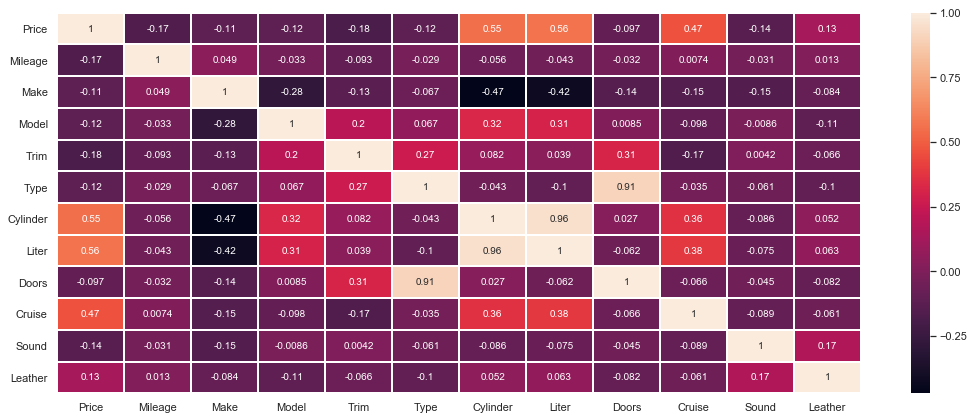

In [32]:
# calculate the correlation matrix
corr = econ_df1.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
plt.figure(figsize = (18,7))
sns.heatmap(corr,annot = True,linewidths=1) # annot=True will give you value

# Multicolinearity (with the help of VIF)

In [33]:
econ_df_before = econ_df1
# the VIF does expect a constant term in the data, 
#so we need to add one using the add_constant method
X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const       47.568762
Price        2.112396
Mileage      1.073142
Make         1.488339
Model        1.487993
Trim         1.236289
Type         6.859204
Cylinder    15.681596
Liter       14.486039
Doors        7.442172
Cruise       1.449974
Sound        1.112669
Leather      1.109486
dtype: float64

In [34]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [35]:
vif_cal(input_data = data.drop(['Type','Liter'],axis=1), dependent_col='Price')

,Var,Vif
0,Mileage,5.75
3,Trim,4.72
2,Model,4.35
6,Cruise,4.31
5,Doors,4.17
1,Make,4.03
8,Leather,3.49
4,Cylinder,3.10
7,Sound,3.06


# Model Building

In [36]:
# define our intput
x_train1 = x_train.drop(['Type','Liter'],axis=1)
x_1 = sm.add_constant(x_train1)
# create a OLS model
model = sm.OLS(y_train, x_1).fit()
print(model.summary())

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     67.28
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           5.58e-83
Time:                        21:30:34   Log-Likelihood:                 215.05
No. Observations:                 562   AIC:                            -410.1
Df Residuals:                     552   BIC:                            -366.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3106      0.045      6.830      0.0

In [37]:
x_train2=x_train.drop(['Type','Doors','Liter'],axis=1)

In [38]:
# define our intput
x2 = sm.add_constant(x_train2)
# create a OLS model
model2 = sm.OLS(y_train,x2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     75.45
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           1.27e-83
Time:                        21:30:34   Log-Likelihood:                 214.31
No. Observations:                 562   AIC:                            -410.6
Df Residuals:                     553   BIC:                            -371.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2919      0.043      6.827      0.0

# Assumption of Model
* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distributed

# Homoscedasicity

In [39]:
Data1 = pd.concat([x_train2,y_train],axis=1)
Data1['Fitted_value']=model2.fittedvalues
Data1['Residual']=model2.resid

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


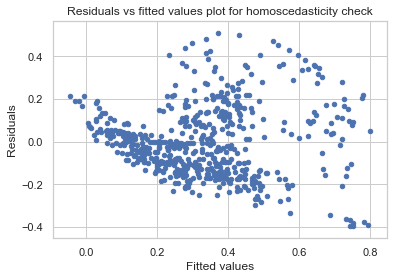

In [40]:
p = Data1.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

The null hypothesis for Breusch-pagan test is that:
* H0 = variance2i = variance2 (the variances for the errors are equal)

The alternate hypothesis (the one you are testing), is that:
* H1 = variance2i not equal variance2 (the variance arenot equal)

In [41]:
# Run the Breusch-pagan test
_,pval2,_,f_pval2 = diag.het_breuschpagan(model2.resid,model2.model.exog)
print(pval2,f_pval2)

7.006291018471546e-19 7.03564650269999e-21


# Normality

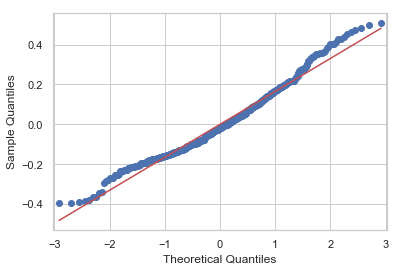

In [42]:
import pylab
# check for the normality of the residuals
sm.qqplot(model2.resid, line = 's')
pylab.show()

In [43]:
# also check that the mean of the residualis approx 0
mean_residuals = sum(model2.resid)/ len(model2.resid)
mean_residuals

3.3420281172768834e-16

# Model Error are IID

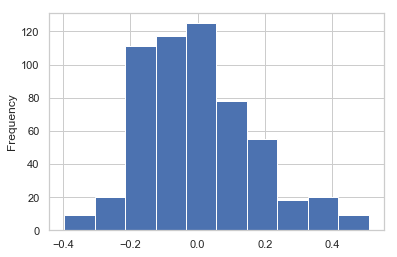

In [44]:
Data1['Residual'].plot.hist()

# Prediction on test data

In [45]:
x_test2 = x_test[['Mileage','Make','Trim','Model','Cylinder','Cruise','Sound','Leather']]

In [46]:
data.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [47]:
x_test2 = sm.add_constant(x_test2)

In [48]:
x_test2.head()

,const,Mileage,Make,Trim,Model,Cylinder,Cruise,Sound,Leather
125,1.0,0.450513,0.2,0.956522,0.451613,1.0,1.0,0.0,1.0
632,1.0,0.427246,0.8,0.717391,0.032258,0.0,1.0,1.0,0.0
358,1.0,0.624056,0.4,0.239130,0.419355,1.0,1.0,0.0,1.0
248,1.0,0.896103,0.4,0.543478,0.290323,0.0,0.0,1.0,1.0
427,1.0,0.615411,0.4,0.673913,0.774194,0.5,0.0,1.0,1.0


In [49]:
y_predict = model2.predict(x_test2)

In [50]:
test= pd.concat([x_test2,y_test],axis=1)

In [51]:
test['Predicted']=y_predict

In [52]:
test.head()

,const,Mileage,Make,Trim,Model,Cylinder,Cruise,Sound,Leather,Price,Predicted
125,1.0,0.450513,0.2,0.956522,0.451613,1.0,1.0,0.0,1.0,0.668969,0.598722
632,1.0,0.427246,0.8,0.717391,0.032258,0.0,1.0,1.0,0.0,0.699857,0.248710
358,1.0,0.624056,0.4,0.239130,0.419355,1.0,1.0,0.0,1.0,0.710313,0.720156
248,1.0,0.896103,0.4,0.543478,0.290323,0.0,0.0,1.0,1.0,0.066447,0.046675
427,1.0,0.615411,0.4,0.673913,0.774194,0.5,0.0,1.0,1.0,0.209632,0.234183


In [53]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342.0,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832.0,0,10,44,3,6,3.1,4,1,0,1


In [54]:
df.shape

(804, 12)

In [55]:
test.shape

(242, 11)

In [56]:
test['orignal_price'] =  df['Price']

In [57]:
test.head()

,const,Mileage,Make,Trim,Model,Cylinder,Cruise,Sound,Leather,Price,Predicted,orignal_price
125,1.0,0.450513,0.2,0.956522,0.451613,1.0,1.0,0.0,1.0,0.668969,0.598722,33220.028446
632,1.0,0.427246,0.8,0.717391,0.032258,0.0,1.0,1.0,0.0,0.699857,0.248710,34355.003728
358,1.0,0.624056,0.4,0.239130,0.419355,1.0,1.0,0.0,1.0,0.710313,0.720156,34739.214960
248,1.0,0.896103,0.4,0.543478,0.290323,0.0,0.0,1.0,1.0,0.066447,0.046675,11080.516378
427,1.0,0.615411,0.4,0.673913,0.774194,0.5,0.0,1.0,1.0,0.209632,0.234183,16341.804099


In [58]:
def denormalize (x,y):
    return (y*(max(x)-min(x)+np.min(x)))

#applying denormalize ()

In [59]:
x=denormalize(df['Price'],test['Predicted'])

In [60]:
test['Predicted_price']=x

In [61]:
test.head()

,const,Mileage,Make,Trim,Model,Cylinder,Cruise,Sound,Leather,Price,Predicted,orignal_price,Predicted_price
125,1.0,0.450513,0.2,0.956522,0.451613,1.0,1.0,0.0,1.0,0.668969,0.598722,33220.028446,27172.191664
632,1.0,0.427246,0.8,0.717391,0.032258,0.0,1.0,1.0,0.0,0.699857,0.248710,34355.003728,11287.391255
358,1.0,0.624056,0.4,0.239130,0.419355,1.0,1.0,0.0,1.0,0.710313,0.720156,34739.214960,32683.322995
248,1.0,0.896103,0.4,0.543478,0.290323,0.0,0.0,1.0,1.0,0.066447,0.046675,11080.516378,2118.281145
427,1.0,0.615411,0.4,0.673913,0.774194,0.5,0.0,1.0,1.0,0.209632,0.234183,16341.804099,10628.104867


# Performance on test dataset

In [62]:
import math
#calculate the mse
model_mse = mean_squared_error(test['Price'], test['Predicted'])
# calculate the mae
model_mae =  mean_absolute_error(test['Price'],test['Predicted'])
# calculate rmse
model_rmse  = math.sqrt(model_mse)
# display the output
print('MSE{: .3}'.format(model_mse))
print('MAE{: .3}'.format(model_mae))
print('RMSE{: .3}'.format(model_rmse))

MSE 0.0307
MAE 0.141
RMSE 0.175


# Performance on training data set

In [63]:
import math
#calculate the mse
model_mse = mean_squared_error(Data1['Price'], Data1['Fitted_value'])
# calculate the mae
model_mae =  mean_absolute_error(Data1['Price'], Data1['Fitted_value'])
# calculate rmse
model_rmse  = math.sqrt(model_mse)
# display the output
print('MSE{: .3}'.format(model_mse))
print('MAE{: .3}'.format(model_mae))
print('RMSE{: .3}'.format(model_rmse))

MSE 0.0273
MAE 0.131
RMSE 0.165
